In [34]:
import torch
import pandas as pd

from glob import glob
from tqdm.notebook import tqdm

In [68]:
#DEAM沒有提供歌名
#PME lyrics proccess

files = glob('./data/PME/lyrics/*.lrc')
dic = {}
for file in files:
    with open(file) as f:
        ID = file.split('/')[-1].split('.')[0]
        texts = f.read()
        lyrics = ''.join([text.split(']')[1] for text in texts.split('\n') if (len(text.split(']')) > 1 and text.split(']')[1] != '')]).replace("\'","")
        dic[ID] = lyrics
torch.save(dic,'./data/dic_PME_lyrics.pt')        

In [37]:
# download Q4 lyrics from musixmatch
# 版權問題只能顯示30%歌詞

df_Q4  = pd.read_csv('./data/Q4_MER/panda_dataset_taffc_metadata.csv', encoding = "ISO-8859-1")
from musixmatch import Musixmatch
dic = {}
musixmatch = Musixmatch('919023a303de11595b292d0106779f6c')
for artist,title,ID in tqdm(zip(df_Q4['Artist'],df_Q4['Title'],df_Q4['Song']),total=len(df_Q4)):
    lyrics = musixmatch.matcher_lyrics_get(title,artist)
    for message in lyrics:
        for body in lyrics[message]:
            if body == "body":
                for lyric in lyrics[message][body]:
                    for lyrBod in lyrics[message][body][lyric]:
                        if lyrBod == "lyrics_body":
                            dic[ID] = lyrics[message][body][lyric][lyrBod]

  0%|          | 0/900 [00:00<?, ?it/s]

In [61]:
dic_pre = {}
keys = list(dic.keys())
for key in keys:
    dic_pre[key] = ''.join(dic[key].split('*******')[0].split('\n'))
    if dic_pre[key] == '':
        dic_pre.pop(key)
torch.save(dic_pre,'./data/dic_Q4_lyrics.pt')

have 629 lyrics


<Figure size 1152x432 with 0 Axes>

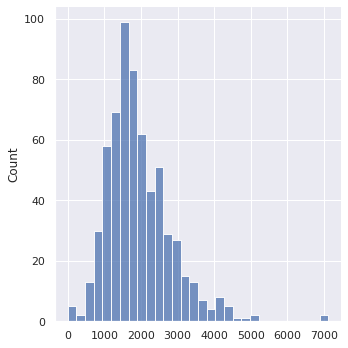

In [22]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt 
pt = torch.load('./data/dic_PME_lyrics.pt')
L_PME = [len(l) for l in list(pt.values())]
print('have {} lyrics'.format(len(list(pt.keys()))))
plt.figure(figsize=(16, 6))
sns.displot(L_PME)

have 479 lyrics


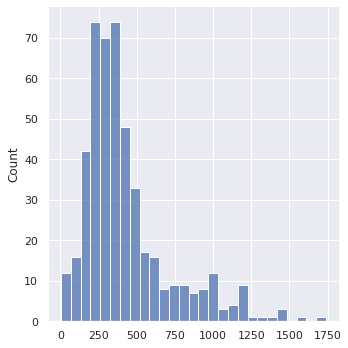

In [19]:
pt = torch.load('./data/dic_Q4_lyrics.pt')
L_Q4 = [len(l) for l in list(pt.values())]
print('have {} lyrics'.format(len(list(pt.keys()))))
sns.displot(L_Q4)

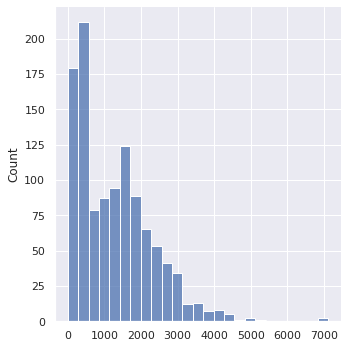

In [25]:
sns.displot(L_PME+L_Q4)